# Theory

The theory of scalar Fourier Optics considers a function $U(x,y,z,t)$ that satisfies

$$\left(\nabla^2 - \frac{1}{c^2} \frac{\partial^2}{\partial t^2}\right) U(x,y,z,t) = 0$$

and where $|U|^2$ is the intensity of the light. In some cases, $U$ can be thought of as the dominant component of the electric/magnetic field (i.e. $E_x$ for plane waves). In other cases, it is more difficult to interpret.

For light of a frequency $\omega=2 \pi f$ (monoenergetic, all light is the same frequency) one can look for solutions of the form $U = u(x,y,z)e^{-i\omega t}$ which yields the equation

$$\nabla^2 u + k^2 u =0 \hspace{10mm} k = \omega/c = 2 \pi f / c = 2 \pi / \lambda$$

$|u|^2$ represents the intensity of light at a given point. This is the equation, **The Helmholtz Equation**, is what we need to solve. We start by looking for solutions that are seperable ($s$ for seperable):

$$u_s(x, y, z) = f_x(x) \times f_y(y) \times f_z(z)$$

i.e., as the product of a function of ''x'', times a function of ''y'', times a function of ''z''. (*The general solution for a particular problem won't be seperable, but it can be written as the sum of infinitely many seperable solutions*). It follows that

$$ \nabla^2 u_s = \frac{\partial^2 u_s}{\partial x^2} + \frac{\partial^2 u_s}{\partial y^2} + \frac{\partial^2 u_s}{\partial z^2}  $$

and the following equation for the 3 individual functions is obtained

$$ f''_x(x)f_y(y)f_z(z) + f_x(x)f''_y(y)f_z(z) + f_x(x)f_y(y)f''_z(z) + k^2f_x(x)f_y(y)f_z(z)=0 $$

which is readily rearranged into the form:

$$ \frac{f''_x(x)}{f_x(x)}+ \frac{f''_y(y)}{f_y(y)} + \frac{f''_z(z)}{f_z(z)} + k^2=0 $$

It may now be argued that each quotient in the equation above must, of necessity, be constant. To justify this, let's say that the first quotient is not a constant, and is a function of ''x''. Since none of the other terms in the equation has any dependence on the variable ''x'', the first term also must not have any ''x''-dependence; it must be a constant. (If the first term is a function of ''x'', then there is no way to make the left hand side of this equation be zero.) This constant is denoted as -''k''<sub>x</sub>². Reasoning in a similar way for the ''y'' and ''z'' quotients, three ordinary differential equations are obtained for the ''f''<sub>x</sub>, ''f''<sub>y</sub> and ''f''<sub>z</sub>, along with one ''separation condition'':

$$ \frac{d^2}{dx^2}f_x(x) + k_x^2 f_x(x)=0 $$

$$ \frac{d^2}{dy^2}f_y(y) + k_y^2 f_y(y)=0 $$

$$ \frac{d^2}{dz^2}f_z(z) + k_z^2 f_z(z)=0 $$

$$ k_x^2+k_y^2+k_z^2= k^2 $$

Each of these 3 differential equations has the same solution form: sines, cosines or complex exponentials. We'll go with the complex exponentials,

$$ u_s(x,y,z)=Ae^{ik_x x}e^{ik_y y}e^{ik_z z} $$
$$ \implies u_s(x,y,z) =Ae^{i(k_x x + k_y y)} e^{\pm i z \sqrt{k^2-k_x^2-k_y^2} } $$

with a generally complex number $A$. To get the general solution, one needs to take a linear combination of all seperable solutions (infinitely many of them so need an integral as a sum):

$$u(x,y,z) = \iint_{-\infty}^{\infty} u_s(x,y,z,k_x,k_y) dk_x dk_y $$

Note that each seperable solution is specified by its value of $k_x$ and $k_y$, so we denote the corresponding amplitude as $A(k_x, k_y)$:

$$ u(x,y,z)=\int_{-\infty}^{+\infty}    \int_{-\infty}^{+\infty}      A(k_x,k_y) ~ e^{i(k_x x + k_y y)} ~ e^{\pm i z \sqrt{k^2-k_x^2-k_y^2} } ~ dk_x dk_y  $$

Now note that

$$ u(x,y,0)=\int_{-\infty}^{+\infty}      \int_{-\infty}^{+\infty}  A(k_x,k_y) ~ e^{i(k_x x + k_y y)}  ~ dk_x dk_y $$

This implies that $A(k_x, k_y)$ is the Fourier transform of $u$ at $z=0$

$$\boxed{A(k_x, k_y) = \mathcal{F}[u(x,y,0)]}$$

Note that the original expression

$$ u(x,y,z)=\int_{-\infty}^{+\infty}    \int_{-\infty}^{+\infty} A(k_x, k_y) ~ e^{i(k_x x + k_y y)} ~ e^{\pm i z \sqrt{k^2-k_x^2-k_y^2} } ~ dk_x dk_y  $$

which itself is an inverse Fourier transform of $ A(k_x, k_y) e^{\pm i z \sqrt{k^2-k_x^2-k_y^2} }$, so we can write

$$\boxed{u(x,y,z) = \mathcal{F}^{-1}\left[A(k_x, k_y) e^{- i z \sqrt{k^2-k_x^2-k_y^2} }\right]}$$

We choose the $-$ sign in the $\pm$ because we consider waves moving through the slit. Using the two boxed equation, everything can be solved for provided one knows

* $k$, which is related to the wavelength of the light
* $u(x,y,z=0)$, which is given by the distribution of light as it exists the slit.



In [4]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift

import imageio
import matplotlib.pyplot as plt

import pint
u = pint.UnitRegistry()

## single slit

In [5]:
D = 0.1 * u.mm     # slit width 
lam = 660 * u.nm   # wave length 

In [7]:
x = np.linspace(-2,2,1600) * u.mm
xv, yv = np.meshgrid(x,x)

In [12]:
# define U0 = u(x,y,0), this is the sitribtion of light as it exit the slit 
U0 = (np.abs(xv)<D/2) * (np.abs(yv) < 0.5 *u.mm)
U0 = U0.astype(float)

Text(0, 0.5, 'Y-Position [mm]')

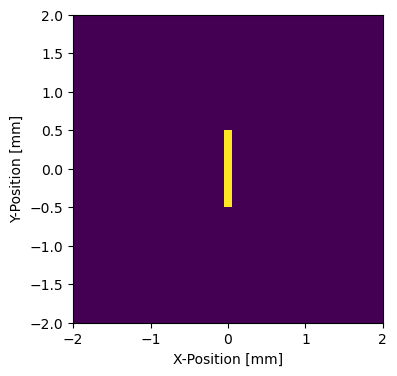

In [15]:
# plot U0 
plt.figure(figsize=(4,4))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')

In [16]:
# get the A(kx,ky)
A = fft2(U0)

(-100.0, 100.0)

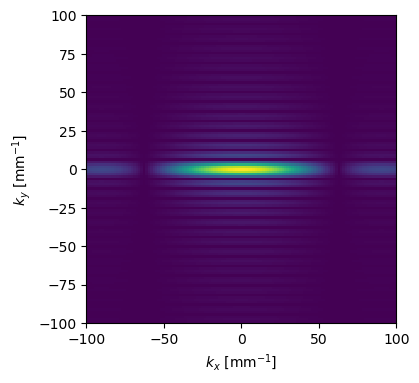

In [23]:
# get the msehgrid of (kx,ky) and plot A 
kx = fftfreq(len(x),np.diff(x)[0]) * 2* np.pi
kxv,kyv = np.meshgrid(kx,kx)

plt.figure(figsize=(4,4))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlabel('$k_x$ [mm$^{-1}$]')
plt.ylabel('$k_y$ [mm$^{-1}$]')
plt.xlim(-100,100)
plt.ylim(-100,100)

In [24]:
# get the U at distance z from the slit 
k = 2*np.pi/lam
d = 3 * u.cm

def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2 - kxv**2 -kyv**2)))

/home/amara/anaconda3/lib/python3.9/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)
/home/amara/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


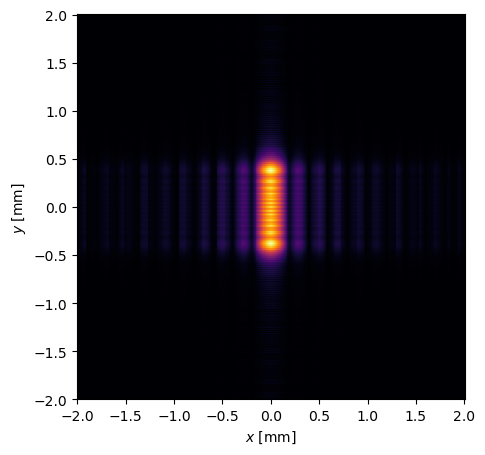

In [26]:
U = get_U(d,k)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

For the single slit experiment, minima of intensity occur at angles $\theta$ (slit and screen) such that

$$D\sin\theta = m\lambda$$

where $D$ is the slit width and $m$ is a non-zero integer. Noting that

$$\sin\theta = x/\sqrt{x^2 + d^2}$$

where $x$ is the horizontal distance on the screen and $d$ is the distance from the slit to screen, we can solve for the positions $x$ at minima:

$$x = \frac{m \lambda d}{\sqrt{D^2 - m^2 \lambda^2}}$$



In [27]:
m = np.arange(1,5,1)  # get the fist 5 minimas 
x_min = np.sqrt(m**2 * lam**2 * d**2/(D**2 - m**2 * lam**2)).to('mm')

/home/amara/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


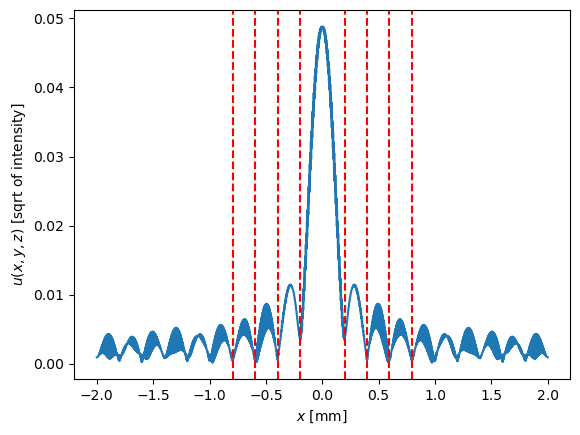

In [40]:
plt.plot(x, np.abs(U)[500])
[plt.axvline(x.magnitude, ls='--', color='r') for x in x_min]
[plt.axvline(-x.magnitude, ls='--', color='r') for x in x_min]
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.show()

In [41]:
# let's write one fucntion that do all the steps described earlier 

def compute_U(U0,x,lam,z):
    xv,yv = np.meshgrid(x,x)
    A = fft2(U0)
    kx = 2*np.pi * fftfreq(len(x),np.diff(x)[0])
    kxv,kyv = np.meshgrid(kx,kx)
    k = 2 *np.pi/lam
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2 - kxv**2 -kyv**2)))

##  Double slit

In [43]:
S = 0.2*u.mm                            # the seperation between the two slits 
D = 0.05*u.mm                           # the width of each slit 
x = np.linspace(-4,4,3200) * u.mm
xv, yv = np.meshgrid(x, x)

U0 = (np.abs(xv-S/2)< D/2) * (np.abs(yv)<2*u.mm) + (np.abs(xv+S/2)< D/2) * (np.abs(yv)<2*u.mm)
U0 = U0.astype(float)

/home/amara/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


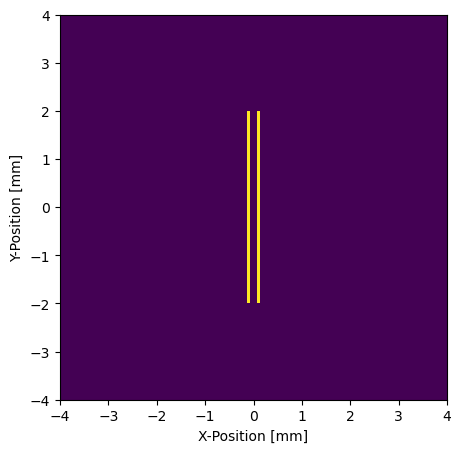

In [44]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

In [45]:
# compute U(x,y,z=5)
U = compute_U(U0,x,lam,z=5*u.cm)

/home/amara/anaconda3/lib/python3.9/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


/home/amara/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:701: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


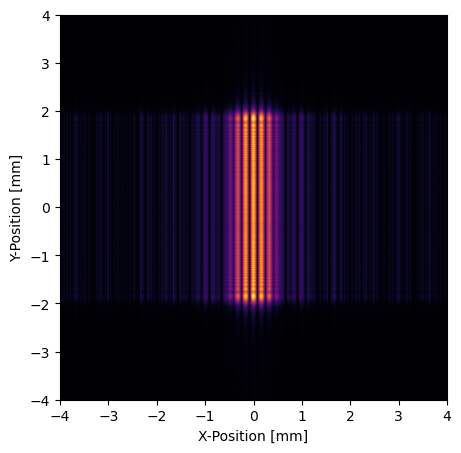

In [46]:
# plot 
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

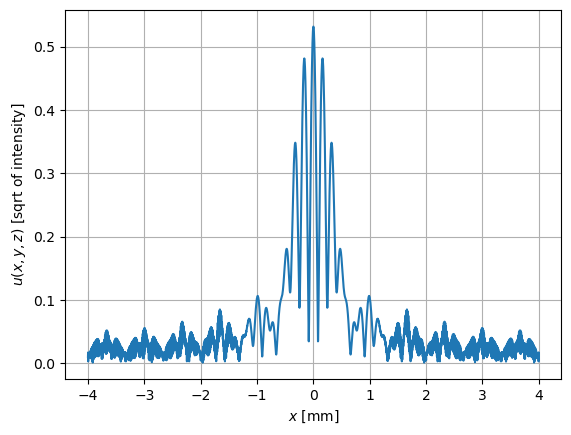

In [59]:
plt.plot(x, np.abs(U[1600]))
plt.xlabel('$x$ [mm]')
plt.ylabel('$u(x,y,z)$ [sqrt of intensity]')
plt.grid()